In [1]:
import io
from IPython.nbformat import current

def execute_notebook(nbfile):
    
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    
    ip = get_ipython()
    
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)


C:\ProgramData\Anaconda3\envs\mokshtech\lib\site-packages\IPython\nbformat.py:12: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  warn("The `IPython.nbformat` package has been deprecated since IPython 4.0. "
C:\ProgramData\Anaconda3\envs\mokshtech\lib\site-packages\nbformat\current.py:15: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  warnings.warn("""nbformat.current is deprecated.


In [2]:
execute_notebook("util.ipynb")


C:\Users\sanjo\PycharmProjects\mokshtech\stock_predictor\optionvaluecalculation\strategies
['.ipynb_checkpoints', 'BANKNIFTYmonthly_option_buy_Bhavcopy_Pandl.csv', 'BANKNIFTYmonthly_option_buy_nsepy_Pandl.csv', 'df.csv', 'forwordvolatility.py', 'input.csv', 'monthlyoptionbuying-addingsellleg.ipynb', 'monthlyoptionbuying.ipynb', 'monthy_nifty_option_buy_Bhavcopy_Pandl.csv', 'monthy_nifty_option_buy_nsepy_Pandl.csv', 'NIFTY.csv', 'optionPriceTrendAnalysis.ipynb', 'preDefinedStrategies', 'straddle.py', 'strategies.py', 'util.ipynb', 'util.py', 'weeklyOptionBuy.ipynb', 'weeklyOptionBuy_Selladditon.ipynb', 'weekly_banknifty_option_buy_Pandl.csv', 'weekly_nifty_option_buy_Pandl.csv', '__init__.py']


In [3]:
class TradeBook:
     
    "This is TradeBook class to add Trades of statergy"
    LongTradedf = pd.DataFrame()
    ShortTradedf = pd.DataFrame()
    month_profit_loss= pd.DataFrame()
    #month_profit_loss.columns =['Buy_date','Sell_Date','Strike_price','Buy_price','Sell_price',
    #                            'Total_PandL','Cum_PandL']
    
     
    def addMatchingidentifer(self,trade,number):
        trade["Match_Id"] = number
        return trade
   
    def addTradeLeg(self, trade,number,iflong):
        trade =self.addMatchingidentifer(trade,number)
        if iflong :   
             self.LongTradedf = self.LongTradedf.append(trade)
        else:
            self.ShortTradedf = self.ShortTradedf.append(trade)
   
    
    def printTradeBook(self):
        print("printing tradebook-Long")
        print(self.LongTradedf)
        print("printing tradebook-Short")
        print(self.ShortTradedf)
        
    def calcualteMonthProfitLoss(self):
        df = self.LongTradedf
        df1 = df.groupby(['Expiry','Option Type','Strike Price','Match_Id']) 
        
        for name ,group in df1:
            df2 = group.sort_values("Date", ascending=True)
            month_profit_loss= pd.DataFrame()           
            df2.reset_index(level=0, inplace=True)
            month_profit_loss['Buy_date']= df2.head(1)['Date']
            month_profit_loss['Sell_date']= df2.head(1)['Expiry']
            month_profit_loss['Strike_price']= df2.head(1)['Strike Price']
            month_profit_loss['Buy_Price']= df2.head(1)['Open']
            month_profit_loss['Sell_Price']= df2.tail(1)['Low'].min()
            month_profit_loss['Trade_Type']= "Long"
            month_profit_loss['Option Type']= df2.head(1)['Option Type']
            #month_profit_loss= month_profit_loss.replace(np.nan, 0)
            #month_profit_loss['Total_PandL']= df2.tail(1)['Close']-df2.head(1)['Open']
            month_profit_loss['Total_PandL']= month_profit_loss['Sell_Price']-month_profit_loss['Buy_Price']
            #print(month_profit_loss)
            
            self.month_profit_loss =self.month_profit_loss.append(month_profit_loss)
        df3 = self.ShortTradedf
        df4 = df3.groupby(['Expiry','Option Type','Strike Price','Match_Id']) 
        for name ,group in df4:
            df5 = group.sort_values("Date", ascending=True)
            month_profit_loss= pd.DataFrame()
            #print(name)
            df5.reset_index(level=0, inplace=True)
            month_profit_loss['Buy_date']= df5.head(1)['Date']
            month_profit_loss['Sell_date']= df5.head(1)['Expiry']
            month_profit_loss['Strike_price']= df5.head(1)['Strike Price']
            month_profit_loss['Buy_Price']= df5.head(1)['Open']
            month_profit_loss['Sell_Price']= df5.tail(1)['Close'].min()
            month_profit_loss['Trade_Type']= "Short"
            month_profit_loss['Option Type']= df5.head(1)['Option Type']
            month_profit_loss= month_profit_loss.fillna(0)
            month_profit_loss['Total_PandL']=  month_profit_loss['Buy_Price']- month_profit_loss['Sell_Price']
            
            self.month_profit_loss =self.month_profit_loss.append(month_profit_loss)
         
        #print(self.month_profit_loss)

        
        

In [4]:
    def monthlyOptionBuyusingNsePy():
        print(os.getcwd())
        print(os.listdir())

        banknifty = pd.DataFrame()
        formatted_banknifyt_df = pd.DataFrame(['Year_month','P&L'])
        month_profit_loss = pd.DataFrame()

        delta = relativedelta(years=+1)
        #monthly_expirty_date =getMonthlyExpirtyFromBahvcopy()
        #monthly_expirty_date = getMonthlyExpirtyDate()
        #print("monthly_expirty_date",monthly_expirty_date)
        year_month_list =[]
        p_N_L_list =[]
        cum_p_N_L_list =[]
        slipage = 5
        P_N_L_dic =  {}
        # code using nsepy to make sure its bhavcopy is giving matching result

        banknifty = pd.DataFrame()
        tradebook = TradeBook()
        for current_expiry_date in  expiry_list:
            
            try:
                val =0
                expiry_day = datetime.datetime.strptime(current_expiry_date,'%Y-%m-%d')
                today_date =datetime.datetime.strptime( str(date.today()),'%Y-%m-%d')
                if expiry_day < today_date:
                    #print(expiry_day)
                    first_day_of_the_month = expiry_day.replace(day=1)
                    first_day_of_the_month =checkfirstTradyingDayofMonth(first_day_of_the_month,expiry_day)
                    #print(first_day_of_the_month)
                    nifty_fut = nsepy.get_history(symbol=symbol,
                                        start=first_day_of_the_month,
                                        end=first_day_of_the_month,
                                        index=True,
                                        futures=True,
                                        expiry_date=expiry_day)
                    strike_price = (nifty_fut['Open']- (nifty_fut['Open'])%100).astype(float).min()
                    #print(strike_price)
                    fifteen_day_of_the_month = expiry_day.replace(day=15)
                    #print("fifteen_day_of_the_month",fifteen_day_of_the_month)

                    fifteen_day_of_the_month =checkfirstTradyingDayofMonth(fifteen_day_of_the_month,expiry_day)
                    fifteen_day_of_the_month =expiry_day

                    buy_opt_ce = nsepy.get_history(symbol=symbol,
                                        start=first_day_of_the_month,
                                        end=first_day_of_the_month,
                                        index=True,
                                        option_type='CE',
                                        strike_price=strike_price,
                                        expiry_date=expiry_day)




                    buy_opt_pe = nsepy.get_history(symbol=symbol,
                                        start=first_day_of_the_month,
                                        end=first_day_of_the_month,
                                        index=True,
                                        option_type='PE',
                                        strike_price=strike_price,
                                        expiry_date=expiry_day)
                    add_leg_opt_pe_sell = nsepy.get_history(symbol=symbol,
                                        start=first_day_of_the_month,
                                        end=first_day_of_the_month,
                                        index=True,
                                        option_type='PE',
                                        strike_price=strike_price-1000,
                                        expiry_date=expiry_day)

                    sell_opt_ce = nsepy.get_history(symbol=symbol,
                                        start=fifteen_day_of_the_month,
                                        end=fifteen_day_of_the_month,
                                        index=True,
                                        option_type='CE',
                                        strike_price=strike_price,
                                        expiry_date=expiry_day)

                    sell_opt_pe = nsepy.get_history(symbol=symbol,
                                        start=fifteen_day_of_the_month,
                                        end=fifteen_day_of_the_month,
                                        index=True,
                                        option_type='PE',
                                        strike_price=strike_price,
                                        expiry_date=expiry_day)
                    add_leg_opt_pe_buy = nsepy.get_history(symbol=symbol,
                                        start=fifteen_day_of_the_month,
                                        end=fifteen_day_of_the_month,
                                        index=True,
                                        option_type='PE',
                                        strike_price=strike_price-1000,
                                        expiry_date=expiry_day)

                    tradebook.addTradeLeg(buy_opt_ce,1,True)
                    tradebook.addTradeLeg(sell_opt_ce,1,True)
                    tradebook.addTradeLeg(buy_opt_pe,2,True)
                    tradebook.addTradeLeg(sell_opt_pe,2,True)
                    tradebook.addTradeLeg(add_leg_opt_pe_sell,3,False)
                    tradebook.addTradeLeg(add_leg_opt_pe_buy,3,False)


                    

            except Exception as error:
                print("File not found {0}".format(error))
       
        tradebook.printTradeBook()
        tradebook.calcualteMonthProfitLoss()
        #print(tradebook.month_profit_loss.Total_PandL.sum())
        #print(month_profit_loss.Total_PandL)
        #print(tradebook.month_profit_loss.groupby('Sell_date').agg({'Total_PandL' :sum}))
        month_profit_loss=tradebook.month_profit_loss
        return month_profit_loss



C:\Users\sanjo\PycharmProjects\mokshtech\stock_predictor\optionvaluecalculation\strategies
['.ipynb_checkpoints', 'BANKNIFTYmonthly_option_buy_Bhavcopy_Pandl.csv', 'BANKNIFTYmonthly_option_buy_nsepy_Pandl.csv', 'df.csv', 'forwordvolatility.py', 'input.csv', 'monthlyoptionbuying-addingsellleg.ipynb', 'monthlyoptionbuying.ipynb', 'monthy_nifty_option_buy_Bhavcopy_Pandl.csv', 'monthy_nifty_option_buy_nsepy_Pandl.csv', 'NIFTY.csv', 'optionPriceTrendAnalysis.ipynb', 'preDefinedStrategies', 'straddle.py', 'strategies.py', 'util.ipynb', 'util.py', 'weeklyOptionBuy.ipynb', 'weeklyOptionBuy_Selladditon.ipynb', 'weekly_banknifty_option_buy_Pandl.csv', 'weekly_nifty_option_buy_Pandl.csv', '__init__.py']
printing tradebook-Long
               Symbol      Expiry Option Type  Strike Price     Open     High      Low  ...  Number of Contracts      Turnover  Premium Turnover  Open Interest  Change in OI  Underlying  Match_Id
Date                                                                          

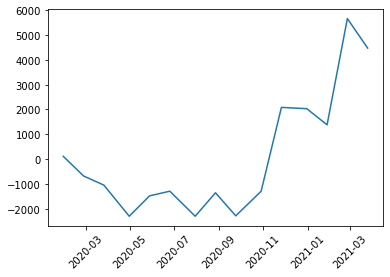

In [5]:

    month_profit_loss_main =monthlyOptionBuyusingNsePy()
    
    #print(month_profit_loss_main)
    
    month_profit_loss= month_profit_loss_main.groupby('Sell_date').agg({'Total_PandL' :sum})
    #print("----Monthly---------")
    #print(month_profit_loss)
    plt.xticks(rotation=45)
    month_profit_loss['Cum_PandL'] = month_profit_loss['Total_PandL'].cumsum()
    #print("----Monthly After cumsum---------")
    #print(month_profit_loss)
    plt.plot(month_profit_loss.index , month_profit_loss['Cum_PandL'])
    plt.show()
    pandlFile =str(symbol)+"monthly_option_buy_nsepy_Pandl.csv"
    month_profit_loss.to_csv(pandlFile)

In [6]:
amount = 400000
sellonelotamountperunit = 1000


month_profit_loss_main["amount_to_invest"] = amount
test =dict()
forTest = month_profit_loss_main

month_profit_loss_group= month_profit_loss_main.groupby(['Sell_date','Trade_Type'])
for name , group in month_profit_loss_group:
    #print(name[1])
    #print(group)
    if name[1]=='Long':
       
        #print ("in long")
        totalprice = group['Buy_Price'].sum()
        #print(totalprice)
        #print("Totalunit",int(amount/(totalprice+sellonelotamountperunit)))
        test.update({name[0]:[name[0],int(amount/(totalprice+sellonelotamountperunit))]})
             
#print(test)
test1 =pd.DataFrame(test)
test1= test1.transpose()
test1.columns = ['Sell_date','Units']


month_profit_loss_main =pd.merge(month_profit_loss_main, test1, on = 'Sell_date', how = "outer")
#print(month_profit_loss_main)


#month_profit_loss_main["Total_PandL_for_all_contracts"] = month_profit_loss_main.apply(lambda x: (x.Total_PandL*x.Units*sellonelotamountperunit)if x.Trade_Type=='Short' else (x.Total_PandL*x.Units), axis=1)
month_profit_loss_main["Total_PandL_for_all_contracts"] = month_profit_loss_main.apply(lambda x:x.Total_PandL*x.Units, axis=1)
#print("Total")
#print(month_profit_loss_main)
#print(month_profit_loss_main["Total_PandL_for_all_contracts"].sum().astype(float))

month_profit_loss_main['Year_month'] = pd.to_datetime(month_profit_loss_main['Sell_date']).dt.strftime('%Y')
print(month_profit_loss_main.groupby('Year_month')["Total_PandL_for_all_contracts"].sum().astype(float))
print(len(month_profit_loss_main.groupby('Year_month')))
result =cagr(amount,month_profit_loss_main["Total_PandL_for_all_contracts"].sum().astype(float),len(month_profit_loss_main.groupby('Year_month')))
print("{:.2%}".format(result))




Long
Short
Long
Short
Long
Short
Long
Short
Long
Short
Long
Short
Long
Short
Long
Short
Long
Short
Long
Short
Long
Short
Long
Short
Long
Short
Long
Short
Long
Short
Year_month
2020    403961.65
2021    327781.75
Name: Total_PandL_for_all_contracts, dtype: float64
2
82.94%



NIFTY2021.csv
Strile price is  14000
0.2 310.0 186.4 299.75
pandl -423.15 21.1575
pandl -444.3075
Strile price is  13700
1400.35 461.65 0.1 330.25
pandl 608.55 30.4275
pandl 578.1225
inlistelse  0
Strile price is  14700
0.15 388.5 358.9 422.2
pandl -451.65000000000003 22.5825
pandl -474.2325
inlistelse  -444.3075
Strile price is  14800
140.3 335.7 292.05 282.7
pandl -186.04999999999995 9.302499999999998
pandl -195.35249999999996
inlistelse  133.81499999999994
r C:/Users/sanjo/PycharmProjects/mokshtech/stock_predictor/database/optionData\NIFTY2021.csv
[-444.3075, 578.1225, -474.2325, -195.35249999999996]
[-444.3075, 133.81499999999994, -340.4175000000001, -535.77]

2021-01-28 00:00:00
2021-01-01 00:00:00
14000.0
0.2 310.0 186.4 299.75
pandl -444.3075
2021-02-25 00:00:00
2021-02-01 00:00:00
13700.0
1400.35 461.65 0.1 330.25
pandl 578.1225
inlistelse  0
2021-03-25 00:00:00
2021-03-01 00:00:00
14700.0
0.15 388.5 358.9 422.2
pandl -474.2325
inlistelse  0
2021-04-29 00:00:00
2021-04-01 00:00:00
14800.0
File not found positional indexers are out-of-bounds
[-444.3075, 578.1225, -474.2325]
[-444.3075, 133.81499999999994, -340.4175000000001]


In [7]:
month_profit_loss_main.loc[month_profit_loss_main["Total_PandL_for_all_contracts"] ==month_profit_loss_main["Total_PandL_for_all_contracts"].max()]

,Buy_date,Sell_date,Strike_price,Buy_Price,Sell_Price,Trade_Type,Option Type,Total_PandL,amount_to_invest,Units,Total_PandL_for_all_contracts,Year_month
7,2020-03-02,2020-03-26,29300.0,539.5,9600.0,Long,PE,9060.5,400000,168,1522164.0,2020


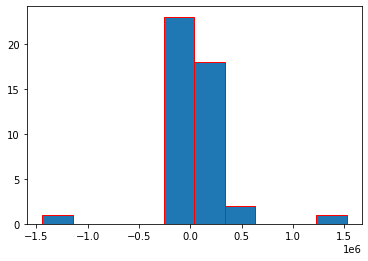

In [8]:
plt.hist(month_profit_loss_main["Total_PandL_for_all_contracts"], edgecolor="red", bins=10)
plt.show()

In [9]:
 month_profit_loss_main['Total_PandL'].sum()

4472.4000000000015

In [10]:
today = str(date.today())
print("Today's date:", today)


Today's date: 2021-04-21


In [11]:
unit = 135
print(1946*unit)
print(1000*unit)
print(unit/75)
print(unit/75*75000)


262710
135000
1.8
135000.0
